## Simultaneous Linear Equations

One of the straightforward methods of solving simultaneous linear equations, such as,
$$ 
\begin{align}
2w+x+4y+z =& -4 \\
3w +4x-y-z =& 3 \\
w -4x +y + 5z =& 9 \\
2w -2x +y +3z =& 7
\end{align}
$$ 
is to write it matrix notation:
$$ 
\begin{align}
\begin{pmatrix}
2 & 1 & 4 & 1 \\
3 & 1 & -1 & -1 \\
1 & -4 & 1 & 5 \\
2 & -2 & 1 & 3 
\end{pmatrix}&
\begin{pmatrix}
w \\ x \\ y \\ z
\end{pmatrix}
= \begin{pmatrix}
-4 \\ 3 \\ 9 \\ 7
\end{pmatrix} \\
{\rm or,}\quad \boldsymbol{Ax} =& \boldsymbol{v}
\end{align}
$$
It seems straightforward to solve equations using
$$ \boldsymbol{x} = \boldsymbol{A^{-1}v} $$
but its numerical implementation is cumbersome. Hence, we turn to other methods.

## Gaussian Elimination

* If we multiply any row of matrix $\boldsymbol{A}$ by any constant, and we multiply the corresponding row of the vector $\boldsymbol{v}$ by the same vector, then the solution does not change.
* We can take any linear combination of two equations to get another correct equation.  

Repeat the steps until you are left with an **upper triangular matrix**. Now you can apply the **backsubstitution** method.  
Applying Gaussian elimination to the above equation, we get
$$ 
\begin{pmatrix}
1 & 0.5 & 2 & 0.5 \\
0 & 1 & -2.8 & -1 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 
\end{pmatrix}
\begin{pmatrix}
w \\ x \\ y \\ z
\end{pmatrix}
= \begin{pmatrix}
-2 \\ 3.6 \\ -2 \\ 1
\end{pmatrix}
$$

## Backsubstitution

A set of equations of the form
$$ \begin{pmatrix}
1 & a_{01} & a_{02} & a_{03} \\
0 & 1 & a_{12} & a_{13} \\
0 & 0 & 1 & a_{23} \\
0 & 0 & 0 & 1 
\end{pmatrix}
\begin{pmatrix}
w \\ x \\ y \\ z
\end{pmatrix}
= \begin{pmatrix}
v_0 \\ v_1 \\ v_2 \\ v_3
\end{pmatrix}
$$
obtained after Gaussian elimiation, can be written out in full as
$$ 
\begin{align}
w + a_{01}x + a_{02}y + a_{03}z =& v_0 \\
x + a_{12}y + a_{13}z =& v_1 \\
y + a_{23}z =& v_2 \\
z =& v_3
\end{align}
$$
This gives the solutions as:
$$ 
\begin{align}
z =& v_3\\
y =& v_2 - a_{23}z \\
x =& v_1 - a_{12}y - a_{13}z \\
w =& v_0 - a_{01}x - a_{02}y - a_{03}z
\end{align}
$$
Applying this to the above case, the solution should be
$$ w = 2, \quad x = -1, \quad y = -2,\quad z = 1 $$

In [1]:
import numpy as np

# create the matrices corresponding to the simultaneous linear equations
A = np.array([[2, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]],float)
v = np.array([-4, 3, 9, 7],float)
N = len(v) # storing length of array for iteration

In [2]:
# Gaussian elimination
for m in range(N):
    # Divide each row by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div
    
    # now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

print(A)

[[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [-0.  -0.  -0.   1. ]]


In [3]:
## Backsubstitution
x = np.empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

print(x)

[ 2. -1. -2.  1.]


## A circuit of resistors

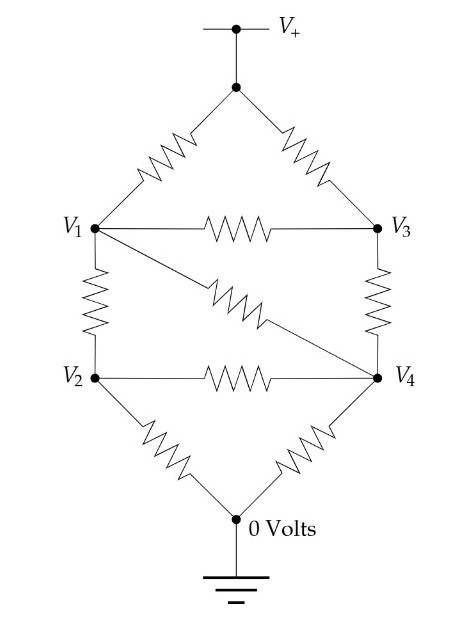

System of equations:
$$ 
\begin{pmatrix}
4 & -1 & -1 & -1 \\
-1 & 0 & 3 & -1 \\
-1 & 3 & 0 & -1 \\
-1 & -1 & -1 & 4 
\end{pmatrix}
\begin{pmatrix}
V_1 \\ V_2 \\ V_3 \\ V_4
\end{pmatrix}
= \begin{pmatrix}
V_+ \\ V_+ \\ 0 \\ 0
\end{pmatrix}
$$
where $V_+=5V$.

In [13]:
# write the code to find voltages at different junctions 
# apply Gaussian elimination and backsubstitution as below

# print out the result of Gaussian elimiation -- does it produce an upper triangular matrix?

import numpy as np

A = np.array([[ 4,-1,-1,-1 ],
           [ -1,0,3,-1 ],
           [ -1,3,0,-1 ],
           [ -1,-1,-1,4]], float)
v = np.array([ 5, 5, 0, 0 ],float)
N = len(v)

# Gaussian elimination
for m in range(N):

    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div

    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

# printing the upper triangular matrix after Gaussian elimination
print(A)

[[  1.    -0.25  -0.25  -0.25]
 [ -0.     1.   -11.     5.  ]
 [  0.     0.     1.    -0.5 ]
 [  0.     0.     0.     1.  ]]


In [14]:
# now calculate the final result

# Backsubstitution
x = np.empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

# final result: V1, V2, V3, V4
print(x)

[3.         1.66666667 3.33333333 2.        ]


In [15]:
### Checking if correct 

from numpy.linalg import solve

print(solve(A,v))

[3.         1.66666667 3.33333333 2.        ]


## Pivoting

If the first element of the first row is 0, we must interchange that row with any other row and then apply Gaussian elimination. This is called *pivoting*.  
This is not always straightforward. Safest bet -- **partial pivoting**.
* Rearrange the rows at each step
* Check mth element of each row and choose the row with highest absolute value of mth element.
* Swap chosen row with current row, and repeat.  

Solve the following:
$$ \begin{pmatrix}
0 & 1 & 4 & 1 \\
3 & 4 & -1 & -1 \\
1 & -4 & 1 & 5 \\
2 & -2 & 1 & 3 
\end{pmatrix}
\begin{pmatrix}
w \\ x \\ y \\ z
\end{pmatrix}
= \begin{pmatrix}
-4 \\ 3 \\ 9 \\ 7
\end{pmatrix}
$$

In [7]:
A = np.array([[0,1,4,1],
           [3,4,-1,-1],
           [1,-4,1,5],
           [2,-2,1,3]],float)

v = np.array([-4,3,9,7],float)
N = len(v)

# Gaussian elimination
for m in range(N):
    # Check if A[m,m] is the largest value from elements below and perform swapping
    for i in range(m+1,N):
        if A[m,m] < A[i,m]:
            A[[m,i],:] = A[[i,m],:]	
            v[[m,i]] = v[[i,m]]
    
    # Divide each row by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div
    
    # now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

print(A)

[[ 1.          1.33333333 -0.33333333 -0.33333333]
 [ 0.          1.          4.          1.        ]
 [ 0.          0.          1.          0.47058824]
 [-0.         -0.         -0.          1.        ]]


In [8]:
# Backsubstitution
x = np.empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

print(x)

[ 1.61904762 -0.42857143 -1.23809524  1.38095238]


In [9]:
print(solve(A,v))

[ 1.61904762 -0.42857143 -1.23809524  1.38095238]


# Try it yourself

### Total 4 marks

Finish coding the resistor problem above, and post the code with the final result.